#### Objective

This notebook shows an example of how to:
- Use Welly to load two wells with Vp, Vs, and RHOB curves
- store the wells in Pandas DataFrames, the nconcatenate in a single Pandas DataFrame 
- filter and upscale with Backus average all curves individually, well by well, using Padas groupby 

#### Import libraries

In [3]:
import bruges as br
import numpy as np
import pandas as pd
from welly import Well
import matplotlib.pyplot as plt

#### Import wells

In [4]:
R39 = Well.from_las('../data/R-39.las')

In [5]:
w129 = Well.from_las('../data/P-129_out.las')

#### Data clean-up and manipulation

- Make dataframes
- Deal with null values
- Select columns of interest
- Convert slowness to velocity
- Add well name column
- Concatenate dataframes

Make dataframes

In [6]:
w39_df = R39.df()
w39_df = w39_df[['DT4P', 'DT4S', 'RHOB']]
w39_df.columns = ['DT', 'DTS', 'RHOB']
w39_df.describe(include = 'all')

,DT,DTS,RHOB
count,7843.000000,7843.000000,7843.000000
mean,279.843323,455.340913,2493.556531
std,25.963527,439.113290,114.662210
min,166.347500,-3278.379200,2050.229000
25%,262.778350,461.351100,2450.387250
50%,284.251700,515.766000,2505.075000
75%,299.587350,555.725100,2569.123050
max,348.946300,590.522000,3144.669700


Checking well R-39 for null values

In [7]:
for x in w39_df.columns:
    print (x, w39_df[x].isnull().values.any())
    
print(w39_df.isnull().sum()) # finds how many missing points there are

DT False
DTS False
RHOB False
DT      0
DTS     0
RHOB    0
dtype: int64


There are no null values. Let's check P-129

In [8]:
w129_df = w129.df()
w129_df = w129_df[['DT', 'DTS', 'RHOB']]
w129_df.describe(include = 'all')

,DT,DTS,RHOB
count,10849.000000,10849.000000,12706.000000
mean,63.079581,107.130227,2.613905
std,6.529252,12.768716,0.254194
min,40.583134,78.108894,1.173953
25%,59.051884,95.867264,2.526581
50%,62.427273,104.755768,2.660124
75%,67.749290,117.124069,2.716325
max,112.469643,174.300812,4.628800


In [9]:
for x in w129_df.columns:
    print (x, w129_df[x].isnull().values.any())

print(w129_df.isnull().sum()) # finds how many missing points there are

DT True
DTS True
RHOB True
DT      1869
DTS     1869
RHOB      12
dtype: int64


It looks like there are several null values in P-129. Below we replace missing values with the mean, then check again

In [10]:
w129_df['DT'].fillna(w129_df['DT'].mean(),inplace=True)
w129_df['DTS'].fillna(w129_df['DTS'].mean(),inplace=True)
w129_df['RHOB'].fillna(w129_df['RHOB'].mean(),inplace=True)

for x in w129_df.columns:
  print(x, w129_df[x].isnull().values.any())

DT False
DTS False
RHOB False


Convert slowness to velocity

For well P-129: usec/ft >> m/s

In [11]:
w129_df['Vp'] = 3.048e5 / w129_df['DT'] 
w129_df['Vs'] = 3.048e5 / w129_df['DTS'] 
w129_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs
count,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000
mean,63.079581,107.130227,2.613905,4876.049465,2878.208171
std,6.030398,11.793147,0.254074,467.228702,303.291856
min,40.583134,78.108894,1.173953,2710.064626,1748.700978
25%,59.557922,97.162529,2.526682,4571.141464,2652.189518
50%,63.079581,107.130227,2.659987,4831.991499,2845.135379
75%,66.679188,114.923914,2.716266,5117.707064,3137.011800
max,112.469643,174.300812,4.628800,7510.509225,3902.244457


For well -39: usec/m >> m/s

In [12]:
w39_df['Vp'] = 1.0e6 / w39_df['DT'] 
w39_df['Vs'] = 1.0e6 / w39_df['DTS'] 
w39_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000
mean,279.843323,455.340913,2493.556531,3607.216564,1977.281811
std,25.963527,439.113290,114.662210,367.703324,377.646396
min,166.347500,-3278.379200,2050.229000,2865.770464,-305.028778
25%,262.778350,461.351100,2450.387250,3337.924649,1791.625370
50%,284.251700,515.766000,2505.075000,3518.008863,1932.638279
75%,299.587350,555.725100,2569.123050,3805.488542,2141.848409
max,348.946300,590.522000,3144.669700,6011.512046,3392.929000


Add well name columns

In [15]:
w39_df['DEPTH'] = w39_df.index
w39_df['well'] = 'R-39'
w39_df = w39_df.reset_index(drop=True)
w39_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs,DEPTH,well
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843
unique,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,R-39
freq,NaN,NaN,NaN,NaN,NaN,NaN,7843
mean,279.843323,455.340913,2493.556531,3607.216564,1977.281811,2790.596400,NaN
std,25.963527,439.113290,114.662210,367.703324,377.646396,345.067648,NaN
min,166.347500,-3278.379200,2050.229000,2865.770464,-305.028778,2193.036000,NaN
25%,262.778350,461.351100,2450.387250,3337.924649,1791.625370,2491.816200,NaN
50%,284.251700,515.766000,2505.075000,3518.008863,1932.638279,2790.596400,NaN
75%,299.587350,555.725100,2569.123050,3805.488542,2141.848409,3089.376600,NaN


In [16]:
w129_df['DEPTH'] = w129_df.index
w129_df['well'] = 'P-129'
w129_df = w129_df.reset_index(drop=True)
w129_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs,DEPTH,well
count,12718.000000,12718.000000,12718.000000,12718.000000,12718.000000,12718.00000,12718
unique,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,P-129
freq,NaN,NaN,NaN,NaN,NaN,NaN,12718
mean,63.079581,107.130227,2.613905,4876.049465,2878.208171,970.10220,NaN
std,6.030398,11.793147,0.254074,467.228702,303.291856,559.53884,NaN
min,40.583134,78.108894,1.173953,2710.064626,1748.700978,1.06680,NaN
25%,59.557922,97.162529,2.526682,4571.141464,2652.189518,485.58450,NaN
50%,63.079581,107.130227,2.659987,4831.991499,2845.135379,970.10220,NaN
75%,66.679188,114.923914,2.716266,5117.707064,3137.011800,1454.61990,NaN


Concatenate dataframes drop slownness columns, sort columns

In [17]:
wells = pd.DataFrame()

for i,df in enumerate([ w129_df, w39_df]):
    wells=wells.append(df)   

wells.drop(wells.columns[[0, 1]], inplace=True, axis=1) 
wells = wells[['DEPTH', 'Vp', 'Vs', 'RHOB', 'well']]    
wells.describe(include = 'all')

,DEPTH,Vp,Vs,RHOB,well
count,20561.000000,20561.000000,20561.000000,20561.000000,20561
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,P-129
freq,NaN,NaN,NaN,NaN,12718
mean,1664.530293,4392.052751,2534.549524,952.784764,NaN
std,1010.484213,752.644540,550.283826,1212.057083,NaN
min,1.066800,2710.064626,-305.028778,1.173953,NaN
25%,784.402800,3668.174042,2031.489303,2.629189,NaN
50%,1567.738800,4495.494080,2603.913645,2.731956,NaN
75%,2604.820800,4918.983647,2950.059823,2476.824000,NaN


#### Despike Vp, Vs, and RHOB curves

##### Logic:
    group dataframe by well

        for each well

            for each of Vp, Vs, RHOB
    
                smooth log using Bruges' median

### Replace the despiking with mean below with this more advanced from here:

https://ocefpaf.github.io/python4oceanographers/blog/2015/03/16/outlier_detection/

### In which instead of a fixed threshold you use difference above 2 standard deviations from mean
### Would have to have a rolling mean and rolling std

In [18]:
logs = ['Vp', 'Vs', 'RHOB']

In [19]:
window = 13

ModuleNotFoundError: No module named 'pandas.rolling'

In [31]:
wells_sm = pd.DataFrame()

grouped = wells['well'].unique()

for well in grouped:    
    new_df = pd.DataFrame()   
    for log in logs:
        temp_df=pd.DataFrame()
        lg = wells[log][wells['well'] == well]
        temp_df['log'] = lg 
        md  = 
        mn  = 
        std = 
        diff = np.abs(lg - md)
        idx = diff > 2*np.abs(mn-std)
        lg[idx] = md[idx]
        new_df[str(log) + '_dspk'] = lg 
    wells_sm = pd.concat([wells_sm, new_df])

AttributeError: module 'pandas' has no attribute 'rolling'

Combine DataFrame of smoothed curves with original DataFrame

In [21]:
wells_despiked = (np.concatenate((wells.values, wells_sm.values), axis=1))
cols = list(wells) + list(wells_sm)
wells_despiked_df = pd.DataFrame(wells_despiked, columns=cols)
wells_despiked_df.describe()

,DEPTH,Vp,Vs,RHOB,well,Vp_sm,Vs_sm,RHOB_sm
count,20561.0000,20561.000000,20561.000000,20561.00000,20561,20561.000000,20561.000000,20561.00000
unique,20561.0000,18174.000000,18097.000000,19888.00000,2,18587.000000,18562.000000,20053.00000
top,3200.8572,4831.991499,2845.135379,2.39882,P-129,4831.991499,2845.135379,2.39882
freq,1.0000,1869.000000,1869.000000,195.00000,12718,1857.000000,1857.000000,168.00000


Make sure results make sense

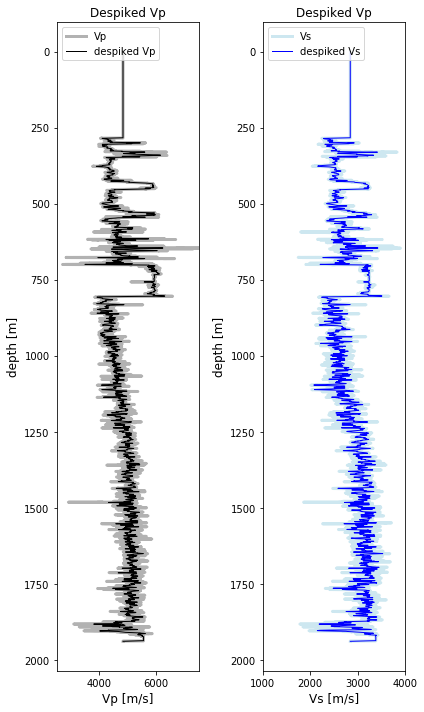

In [22]:
fig = plt.figure(figsize=(6,10))

ax0 = fig.add_subplot(121)
ax0.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vp'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'gray', alpha=0.6, linewidth = 3, label='Vp')
ax0.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vp_sm'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'k', linewidth = 1, label='despiked Vp')
ax0.set_xlim([2500, 7500])
ax0.legend( loc='upper left')
ax0.set_title('Despiked Vp')
ax0.set_ylabel(r'depth [m]', size=12)
ax0.invert_yaxis()
ax0.set_xlabel(r'Vp [m/s]', size=12)

ax1 = fig.add_subplot(122)
ax1.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vs'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'lightblue', alpha=0.6, linewidth = 3, label='Vs')
ax1.plot(wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'Vs_sm'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'P-129', 'DEPTH'],
                                 'b', linewidth = 1, label='despiked Vs')
ax1.set_xlim([1000, 4000])
ax1.legend( loc='upper left')
ax1.set_title('Despiked Vp')
ax1.set_ylabel(r'depth [m]', size=12)
ax1.invert_yaxis()
ax1.set_xlabel(r'Vs [m/s]', size=12)

plt.tight_layout()
plt.show()

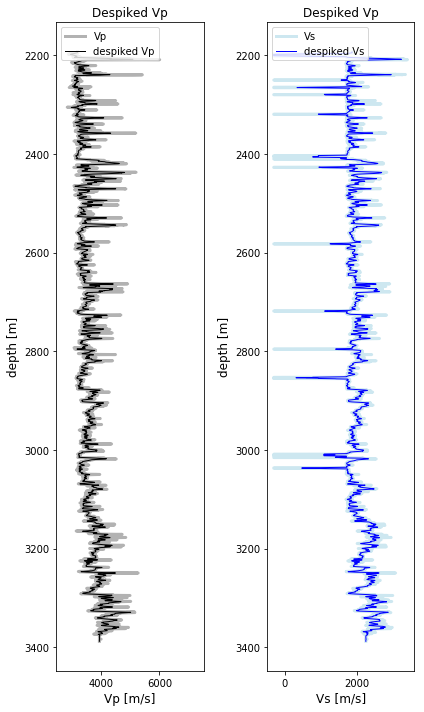

In [23]:
fig = plt.figure(figsize=(6,10))
ax0 = fig.add_subplot(121)
ax0.plot(wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'Vp'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'DEPTH'],
                                 'gray', alpha=0.6, linewidth = 3, label='Vp')
ax0.plot(wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'Vp_sm'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'DEPTH'],
                                 'k', linewidth = 1, label='despiked Vp')
ax0.set_xlim([2500, 7500])
ax0.legend( loc='upper left')
ax0.set_title('Despiked Vp')
ax0.set_ylabel(r'depth [m]', size=12)
ax0.invert_yaxis()
ax0.set_xlabel(r'Vp [m/s]', size=12)

ax1 = fig.add_subplot(122)
ax1.plot(wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'Vs'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'DEPTH'],
                                 'lightblue', alpha=0.6, linewidth = 3, label='Vs')
ax1.plot(wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'Vs_sm'], 
         wells_despiked_df.loc[wells_despiked_df.well == 'R-39', 'DEPTH'],
                                 'b', linewidth = 1, label='despiked Vs')
#ax1.set_xlim([1000, 4000])
ax1.legend( loc='upper left')
ax1.set_title('Despiked Vp')
ax1.set_ylabel(r'depth [m]', size=12)
ax1.invert_yaxis()
ax1.set_xlabel(r'Vs [m/s]', size=12)

plt.tight_layout()
plt.show()

#### Upscale with Backus average Vp, Vs, and RHOB

In [24]:
lb = 30.0

In [25]:
dz = 0.15240

In [26]:
test_vp = np.array(wells_despiked_df['Vp_sm'][wells_despiked_df['well'] == 'P-129'])

In [27]:
print (type(lb), type(dz), type(test_vp))

<class 'float'> <class 'float'> <class 'numpy.ndarray'>


In [28]:
wells_bk = pd.DataFrame()

grouped = wells_despiked_df['well'].unique()

for well in grouped:    
    new_df = pd.DataFrame() 
    Vp = np.array(wells_despiked_df['Vp_sm'][wells_despiked_df['well'] == well])
    Vs = np.array(wells_despiked_df['Vs_sm'][wells_despiked_df['well'] == well])
    rhob = np.array(wells_despiked_df['RHOB'][wells_despiked_df['well'] == well]) 

    Vp_bks, Vs_bks, rhob_bks = br.rockphysics.backus(Vp, Vs, rhob, lb, dz)    
    new_df[str(Vp) + '_bk'] = Vp_bks
    new_df[str(Vs) + '_bk'] = Vs_bks
    new_df[str(RHOB) + '_bk'] = rhob_bks
                     
    wells_bk = pd.concat([wells_bk, new_df])

AttributeError: 'float' object has no attribute 'sqrt'

## Problem is the spikes in Vs
The proper way to fix it is to do 

`Vs<1500 = np.nan`

then use the welly interpolate function for curves `Vs.interpolate()`

In [ ]:
wells_bk = pd.DataFrame()

grouped = wells_despiked_df['well'].unique()

for well in grouped:    
    new_df = pd.DataFrame() 
    Vp = np.array(wells_despiked_df['Vp_sm'][wells_despiked_df['well'] == well])
    Vs = np.array(wells_despiked_df['Vs_sm'][wells_despiked_df['well'] == well])
    rhob = np.array(wells_despiked_df['RHOB'][wells_despiked_df['well'] == well]) 
    print(well, np.amin(Vp), np.amax(Vp))
    print(well, np.amin(Vs), np.amax(Vs))
    print(well, np.amin(rhob), np.amax(rhob))

Combine DataFrame of smoothed curves with original DataFrame

In [ ]:
wells_despiked = (np.concatenate((wells.values, wells_sm.values), axis=1))
cols = list(wells) + list(wells_sm)
wells_despiked_df = pd.DataFrame(wells_despiked, columns=cols)
wells_despiked_df.describe()

##### To be continued...